# Yapay Sinir Ağları ile Rakam Tanıma

### İş Problemi

El yazısı ile yazılan rakamları tanıma

In [2]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [5]:
num_labels = len(np.unique(y_train))

In [6]:
num_labels

10

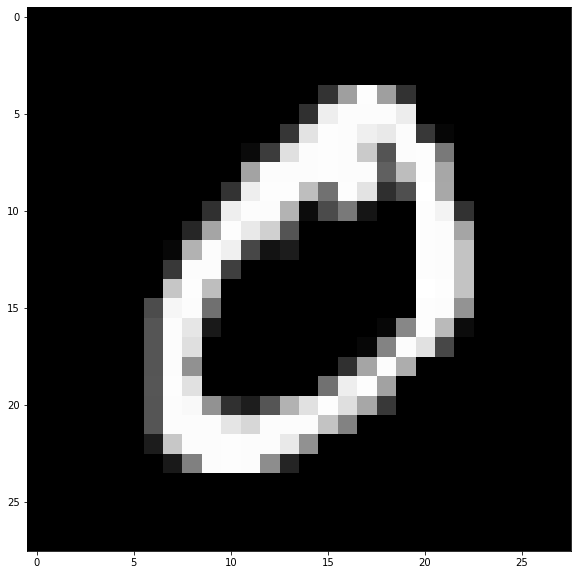

In [7]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[1], cmap = "gray");

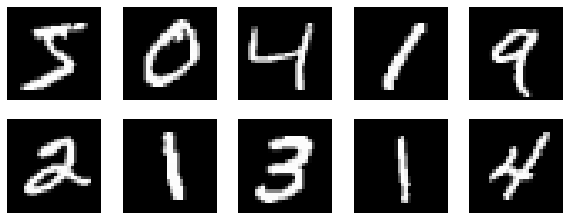

In [8]:
plt.figure(figsize = (10,10))
for n in range(10) :
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap = "gray")
    plt.axis("off")

In [9]:
def visualize_img(data):
    plt.figure(figsize = (10,10))
    for n in range(10) :
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n],cmap = "gray")
        plt.axis("off")

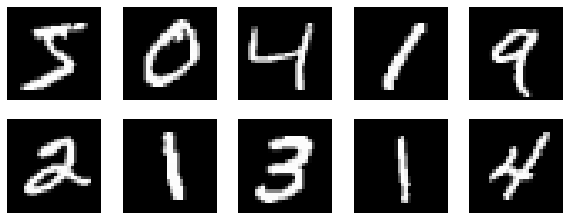

In [10]:
visualize_img(x_train)

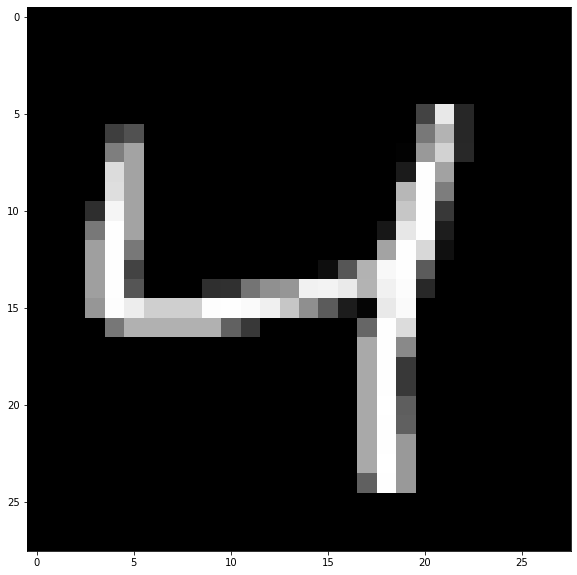

In [16]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[2], cmap = "gray");

In [12]:
# RGB kodları

In [13]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [14]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train[2][14,10]

49

In [18]:
x_train[2].mean()

24.799744897959183

In [19]:
x_train[2].sum()

19443

In [20]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

## Veriyi Hazırlama

### Encoding

In [21]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
y_train = to_categorical(y_train)

In [23]:
y_test = to_categorical(y_test)

In [24]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Reshaping

In [27]:
image_size = x_train.shape[1]

In [28]:
image_size

28

In [29]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [30]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [31]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalization

In [32]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## MODEL

In [36]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units = 128,activation = "relu" , name= "layer1"),
    Dense(units = num_labels,activation = "softmax" , name= "output_layer")])

In [38]:
model.compile(loss = "categorical_crossentropy",
                 optimizer = "adam",
                 metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train,y_train,epochs = 10,batch_size = 128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0614 - precision: 0.9856 - recall: 0.9794 - accuracy: 0.9823 - val_loss: 0.0774 - val_precision: 0.9794 - val_recall: 0.9731 - val_accuracy: 0.9761
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0517 - precision: 0.9872 - recall: 0.9826 - accuracy: 0.9848 - val_loss: 0.0772 - val_precision: 0.9797 - val_recall: 0.9735 - val_accuracy: 0.9760
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0438 - precision: 0.9895 - recall: 0.9857 - accuracy: 0.9875 - val_loss: 0.0782 - val_precision: 0.9786 - val_recall: 0.9736 - val_accuracy: 0.9750
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0378 - precision: 0.9906 - recall: 0.9873 - accuracy: 0.9889 - val_loss: 0.0727 - val_precision: 0.9790 - val_recall: 0.9749 - val_accuracy: 0.9759
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0313 - precision: 0.9926 - r

## Model Başarı Değerlendirme

In [43]:
history = model.fit(x_train,y_train,epochs = 10,batch_size = 128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0121 - precision: 0.9979 - recall: 0.9972 - accuracy: 0.9977 - val_loss: 0.0730 - val_precision: 0.9805 - val_recall: 0.9773 - val_accuracy: 0.9791
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0113 - precision: 0.9979 - recall: 0.9972 - accuracy: 0.9976 - val_loss: 0.0715 - val_precision: 0.9814 - val_recall: 0.9790 - val_accuracy: 0.9798
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0086 - precision: 0.9986 - recall: 0.9983 - accuracy: 0.9985 - val_loss: 0.0822 - val_precision: 0.9787 - val_recall: 0.9766 - val_accuracy: 0.9770
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0087 - precision: 0.9985 - recall: 0.9981 - accuracy: 0.9984 - val_loss: 0.0810 - val_precision: 0.9783 - val_recall: 0.9765 - val_accuracy: 0.9771
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0066 - precision: 0.9990 - r

In [44]:
#### Accuracy ve Loss Grafikleri var bak.

In [47]:
loss,precision,recall,acc = model.evaluate(x_test,y_test,verbose = "False")
print("\n Accuracy : %.1f%% " % (100 * acc))
print("\n Loss : %.1f%% " % (100 * loss))
print("\n Precision : %.1f%% " % (100 * precision))
print("\n Recall : %.1f%% " % (100 * recall))


 Accuracy : 97.9% 

 Loss : 8.7% 

 Precision : 98.0% 

 Recall : 97.8% 


## Modelin Kaydedilmesi ve Tahmini

In [48]:
model.save("mnist_model.h5")

In [49]:
import random

In [50]:
random = random.randint(0 , x_test.shape[0])

In [51]:
random

4333

In [52]:
test_image = x_test[random]

In [53]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [54]:
test_data = x_test[random].reshape(1,28,28,1)

In [55]:
probablibility = model.predict(test_data)

1/1 [==============================] - 0s 71ms/step


In [57]:
probablibility

array([[1.4549437e-09, 3.9729765e-14, 2.0305578e-13, 7.7472848e-08,
        1.1804763e-07, 5.4012470e-09, 4.0412993e-16, 1.2819549e-05,
        5.2642659e-09, 9.9998701e-01]], dtype=float32)

In [58]:
predictid_classes = np.argmax(probablibility)

In [59]:
predictid_classes

9